# Problem Statement 1: Amit wants to purchase office space. He does a detailed survey of the offices and corporate complexes in the area and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools, and workplaces; the reputation of the construction companies, and builders involved in constructing the apartments; the distance of the offices from highways, freeways, and important roads; the facilities around the office space and so on. Each of these factories was quantified, normalized, and mapped to values on a scale of 0 to 1. Amit then makes a table. Each row in the table corresponds to Amit's observations for a particular house. If Amit has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Amit makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries. Amit does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive. There is one important observation that Amit has made. The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4 Dataset: data.csv Input values in the dataset: The first line contains F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square foot. Output values in the prediction: 1 = 180.38 2 = 1312.07 3 = 440.13 4 = 343.72

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
data=pd.read_csv("D:/ML/exam/Data.csv")

In [46]:
data

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


In [61]:
data.shape

(100, 3)

In [47]:
data.describe()


,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [63]:
data.isnull().sum()

F                          0
N                          0
Prprice per square foot    0
dtype: int64

In [48]:
X1=data.iloc[:,1:-1].values
y1=data.iloc[:,-1].values
X1=X1.reshape(-1,1)

In [64]:
len(x),len(y)

(100, 100)

In [65]:
x

array([[0.44],
       [0.99],
       [0.84],
       [0.28],
       [0.07],
       [0.66],
       [0.73],
       [0.57],
       [0.43],
       [0.27],
       [0.43],
       [0.87],
       [0.78],
       [0.9 ],
       [0.41],
       [0.52],
       [0.47],
       [0.65],
       [0.85],
       [0.93],
       [0.41],
       [0.36],
       [0.78],
       [0.69],
       [0.04],
       [0.17],
       [0.68],
       [0.84],
       [0.38],
       [0.12],
       [0.62],
       [0.79],
       [0.82],
       [0.91],
       [0.35],
       [0.57],
       [0.52],
       [0.31],
       [0.6 ],
       [0.99],
       [0.48],
       [0.3 ],
       [0.58],
       [0.65],
       [0.6 ],
       [0.95],
       [0.47],
       [0.15],
       [0.01],
       [0.26],
       [0.01],
       [0.45],
       [0.09],
       [0.96],
       [0.63],
       [0.06],
       [0.1 ],
       [0.26],
       [0.41],
       [0.91],
       [0.83],
       [0.44],
       [0.2 ],
       [0.43],
       [0.21],
       [0.88],
       [0.

In [66]:
y

array([ 511.14,  717.1 ,  607.91,  270.4 ,  289.88,  830.85, 1038.09,
        455.19,  640.17,  511.06,  177.03, 1242.52,  891.37, 1339.72,
        169.88,  276.05,  517.43,  522.25,  932.21,  851.25,  640.11,
        308.68, 1046.05,  332.4 ,  171.85,  109.55,  361.97,  872.21,
        303.7 ,  256.38,  341.2 , 1194.63,  408.6 ,  895.54,  518.25,
        638.75,  301.9 ,  163.38,  240.77, 1449.05,  609.  ,  174.59,
        593.45,  355.96,  671.46, 1193.7 ,  278.88,  411.4 ,   42.08,
        166.19,   58.62,  642.45,  368.14,  702.78,  615.74,  143.79,
        109.  ,  328.28,  205.16, 1360.49,  905.83,  487.33,  202.76,
        202.01,  148.87,  745.3 ,  503.04, 1563.82,  165.21,  438.4 ,
         98.47,  819.63,  174.44,  483.13,  534.24,  572.31,  957.61,
        518.29, 1143.49, 1211.31,  784.74,  283.7 ,  684.38,  719.46,
        292.23,  775.68,  130.77,  801.6 ,  323.55,  726.9 ,  661.12,
        771.11, 1016.14,  237.69,  325.89,  636.22,  272.12,  696.65,
        434.53,  593

In [67]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1,y_test1 =train_test_split(X1,y1,test_size=0.25, random_state=0)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=4)
x_pol=pol_reg.fit_transform(x)


In [69]:
x_pol

array([[1.0000000e+00, 4.4000000e-01, 1.9360000e-01, 8.5184000e-02,
        3.7480960e-02],
       [1.0000000e+00, 9.9000000e-01, 9.8010000e-01, 9.7029900e-01,
        9.6059601e-01],
       [1.0000000e+00, 8.4000000e-01, 7.0560000e-01, 5.9270400e-01,
        4.9787136e-01],
       [1.0000000e+00, 2.8000000e-01, 7.8400000e-02, 2.1952000e-02,
        6.1465600e-03],
       [1.0000000e+00, 7.0000000e-02, 4.9000000e-03, 3.4300000e-04,
        2.4010000e-05],
       [1.0000000e+00, 6.6000000e-01, 4.3560000e-01, 2.8749600e-01,
        1.8974736e-01],
       [1.0000000e+00, 7.3000000e-01, 5.3290000e-01, 3.8901700e-01,
        2.8398241e-01],
       [1.0000000e+00, 5.7000000e-01, 3.2490000e-01, 1.8519300e-01,
        1.0556001e-01],
       [1.0000000e+00, 4.3000000e-01, 1.8490000e-01, 7.9507000e-02,
        3.4188010e-02],
       [1.0000000e+00, 2.7000000e-01, 7.2900000e-02, 1.9683000e-02,
        5.3144100e-03],
       [1.0000000e+00, 4.3000000e-01, 1.8490000e-01, 7.9507000e-02,
        3.41

In [70]:
lin_reg=LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [71]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_pol,y)

LinearRegression()

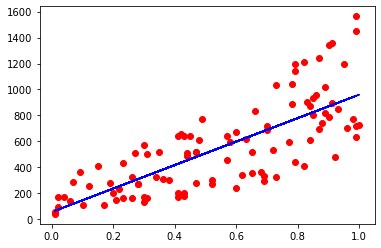

In [72]:
plt.scatter(x,y,color='r')
plt.plot(x,lin_reg.predict(x),color='b')

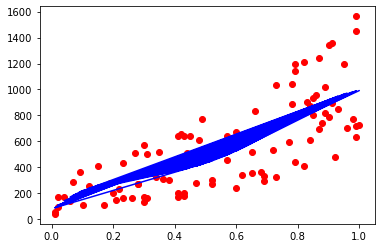

In [73]:
plt.scatter(x,y,color='r')
plt.plot(x,lin_reg2.predict(pol_reg.fit_transform(x)),color='b')

# Q.2 Problem Statement 2: A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lipstick is shown in the table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of the decision tree. According to the decision tree, you have made from the previous Training data set, what is the decision for the test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? Write the concluding statement for the implemented application. [20 Marks, 60 minutes] Dataset:

as we don't have dataset we need to create it

In [76]:
import numpy as np
import pandas as pd

In [87]:
dataset2 ={
    'id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'gender':['male','male','male','male','female','female','female','male','female','female','female','male','female','male'],
    'marital status':['single','married','single','single','single','married','married','single','married','single','married','married','single','married'],
    'buys':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no'],
    
}

In [88]:
#extra dataframe to compare labels
df2=pd.DataFrame(dataset2,columns=['id','age','income','gender','marital status','buys'])

In [89]:
df=pd.DataFrame(dataset2,columns=['id','age','income','gender','marital status','buys'])

In [80]:
dataset = dataset.drop('ID',axis=1)

In [90]:
df.head(15)

,id,age,income,gender,marital status,buys
0,1,<21,high,male,single,no
1,2,<21,high,male,married,no
2,3,21-35,high,male,single,yes
3,4,>35,medium,male,single,yes
4,5,>35,low,female,single,yes
5,6,>35,low,female,married,no
6,7,21-35,low,female,married,yes
7,8,<21,medium,male,single,no
8,9,<21,low,female,married,yes
9,10,>35,medium,female,single,yes


In [91]:
df=df.drop('id',axis=1)

In [92]:
df

,age,income,gender,marital status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [93]:
df.buys.value_counts()

yes    9
no     5
Name: buys, dtype: int64

In [94]:
df.shape

(14, 5)

In [95]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [96]:
df

,age,income,gender,marital status,buys
0,<21,high,male,single,no
1,<21,high,male,married,no
2,21-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,married,no
6,21-35,low,female,married,yes
7,<21,medium,male,single,no
8,<21,low,female,married,yes
9,>35,medium,female,single,yes


In [97]:
x

array([['<21', 'high', 'male', 'single'],
       ['<21', 'high', 'male', 'married'],
       ['21-35', 'high', 'male', 'single'],
       ['>35', 'medium', 'male', 'single'],
       ['>35', 'low', 'female', 'single'],
       ['>35', 'low', 'female', 'married'],
       ['21-35', 'low', 'female', 'married'],
       ['<21', 'medium', 'male', 'single'],
       ['<21', 'low', 'female', 'married'],
       ['>35', 'medium', 'female', 'single'],
       ['<21', 'medium', 'female', 'married'],
       ['21-35', 'medium', 'male', 'married'],
       ['21-35', 'high', 'female', 'single'],
       ['>35', 'medium', 'male', 'married']], dtype=object)

In [98]:
y

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x[:,0]=le.fit_transform(x[:,0])
x[:,1]=le.fit_transform(x[:,1])
x[:,2]=le.fit_transform(x[:,2])
x[:,3]=le.fit_transform(x[:,3])



In [100]:
df

,age,income,gender,marital status,buys
0,1,0,1,1,no
1,1,0,1,0,no
2,0,0,1,1,yes
3,2,2,1,1,yes
4,2,1,0,1,yes
5,2,1,0,0,no
6,0,1,0,0,yes
7,1,2,1,1,no
8,1,1,0,0,yes
9,2,2,0,1,yes


In [101]:
print(list(zip(df2.age,x[:,0])))
print(list(zip(df2.income,x[:,1])))
print(list(zip(df2.gender,x[:,2])))
print(list(zip(df2['marital status'],x[:,3])))

[('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]
[('high', 0), ('high', 0), ('high', 0), ('medium', 2), ('low', 1), ('low', 1), ('low', 1), ('medium', 2), ('low', 1), ('medium', 2), ('medium', 2), ('medium', 2), ('high', 0), ('medium', 2)]
[('male', 1), ('male', 1), ('male', 1), ('male', 1), ('female', 0), ('female', 0), ('female', 0), ('male', 1), ('female', 0), ('female', 0), ('female', 0), ('male', 1), ('female', 0), ('male', 1)]
[('single', 1), ('married', 0), ('single', 1), ('single', 1), ('single', 1), ('married', 0), ('married', 0), ('single', 1), ('married', 0), ('single', 1), ('married', 0), ('married', 0), ('single', 1), ('married', 0)]


In [102]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x,y)

DecisionTreeClassifier()

In [103]:

prediction = dt.predict([[1,1,0,0]])
prediction

array(['yes'], dtype=object)

# we got "yes" as a prediction from our model

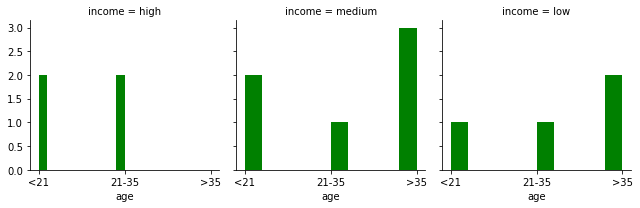

In [104]:
import seaborn as sns
age_income=sns.FacetGrid(df2,col='income')
age_income.map(plt.hist,'age', color='green')

# we can see people with high income and age >35 don't buy but people with medium and low income and age more than 35 buy more than other age group